In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import pickle

## Loading manually labelled data

In [4]:
bin_data = pd.read_csv('./KMTrainingSet/binary/bin_dataset_simulink.csv')

In [5]:
from sklearn.utils import shuffle

In [6]:
bin_data = shuffle(bin_data).reset_index(drop=True)

In [7]:
# storing length of columns ignoring column 'label'
col_len = bin_data.shape[1]-1

# creating a new column list for the csv as there are no column names from MatLab
cols = ['A'+str(each+1) for each in range(int(col_len/2))] + ['V'+str(each+1) for each in range(int(col_len/2))]

# assigning new column names to the dataframe
bin_data.columns = cols + ['label']

## Ploatting the data 

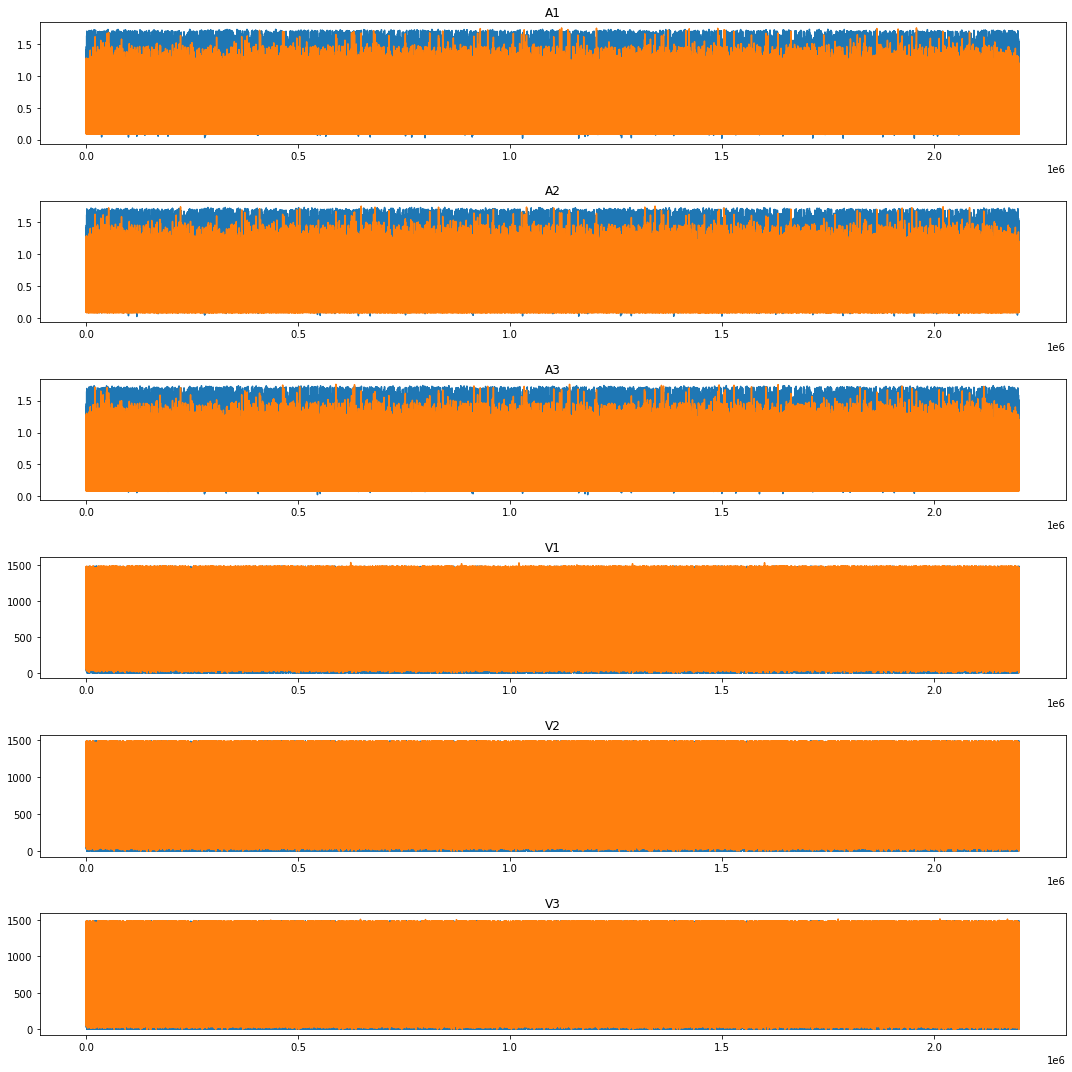

In [8]:
fig, ax = plt.subplots(6,figsize=(15,15))

data = bin_data

normal = data[data.label == 0]
abnormal = data[data.label != 0]
for i in range(col_len):

    ax[i].plot(normal[cols[i]],"-")
    ax[i].plot(abnormal[cols[i]],"-")
    ax[i].set_title(cols[i])
fig.tight_layout()


## Creating SVM (support vector machine)

In [9]:
from sklearn import svm

## binary

In [10]:
bin_data.dropna(inplace = True)

In [11]:
# creating training set ignoring labels
bin_train_data = bin_data[cols]
bin_labels = bin_data['label']

# converting it to list of list from DataFrame
#train_data = train_data.values.tolist()

In [12]:
dataset_percentage = 1
dataset_percentage = int((dataset_percentage*len(bin_train_data))/100)
bin_train_data = bin_train_data.head(dataset_percentage)
bin_labels = bin_labels[:dataset_percentage]
print(bin_train_data.shape,len(bin_labels))

(22000, 6) 22000


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =   train_test_split(bin_train_data,  bin_labels, test_size=0.20)

In [14]:
# configuring and fitting the model
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [15]:
clf.score(X_test, y_test)

0.9745454545454545

In [16]:
filename = 'binary_svm.pkl'
pickle.dump(clf, open(filename, 'wb'))

## multi-class

In [17]:
dataset = pd.read_csv('./KMTrainingSet/multi/mul_dataset_simulink.csv')
dataset.dropna(inplace = True)

In [18]:
# changing column names 
dataset.columns = cols + ['label']
dataset.head()

,A1,A2,A3,V1,V2,V3,label
0,0.56853,0.54301,0.63146,310.56,734.02,690.51,10
1,0.54249,0.53726,0.58146,371.09,798.07,706.18,10
2,0.52705,0.52484,0.52898,436.75,857.12,715.36,10
3,0.52022,0.50440,0.47764,504.24,909.98,719.34,10
4,0.51855,0.47550,0.43147,571.21,955.64,720.07,10


In [19]:
mul_train_data = dataset[cols]
mul_labels = dataset['label']

In [20]:
dataset_percentage = 1
dataset_percentage = int((dataset_percentage*len(dataset))/100)
mul_train_data = mul_train_data.head(dataset_percentage)
mul_labels = mul_labels[:dataset_percentage]
print(mul_train_data.shape,len(mul_labels))

(2874, 6) 2874


In [21]:
X_train, X_test, y_train, y_test =   train_test_split(mul_train_data,  mul_labels, test_size=0.20)

In [22]:
mul_clf = svm.SVC(decision_function_shape='ovr')
mul_clf.fit(X_train, y_train )

SVC()

In [23]:
mul_clf.score(X_test, y_test)

0.9982608695652174

In [24]:
filename = 'multi_svm.sav'
pickle.dump(mul_clf, open(filename, 'wb'))

In [53]:
# reading the new dataset from csv
# new dataset with changed simulation length and occurance time
new_data = pd.read_csv('./KMTrainingSet/1AB.csv')
new_data.columns = cols + ['label']
new_data = new_data[cols]
testing  = new_data.values.tolist()

### Binnary classification

In [54]:
bin_gend_labels = clf.predict(testing)

In [55]:
new_data['label'] = bin_gend_labels

In [59]:
total_labels = ['NML', 'AB', 'AC', 'BC', 'ABC', 'AG', 'BG', 'ABG', 'CG', 'ACG', 'BCG', 'ABCG']
df = new_data
bin_list = ['NML','FAULT']

x = list(bin_gend_labels)

unq_labels = sorted(set(x), key=x.index)
unq_labels = [bin_list[each] for each in unq_labels]
print(unq_labels)

#df['label'] = df['label'].apply(unq_labels.index)




['NML', 'FAULT']


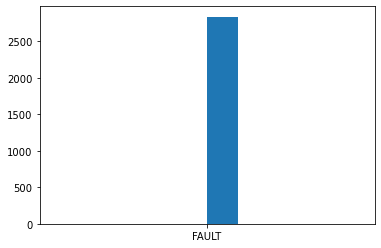

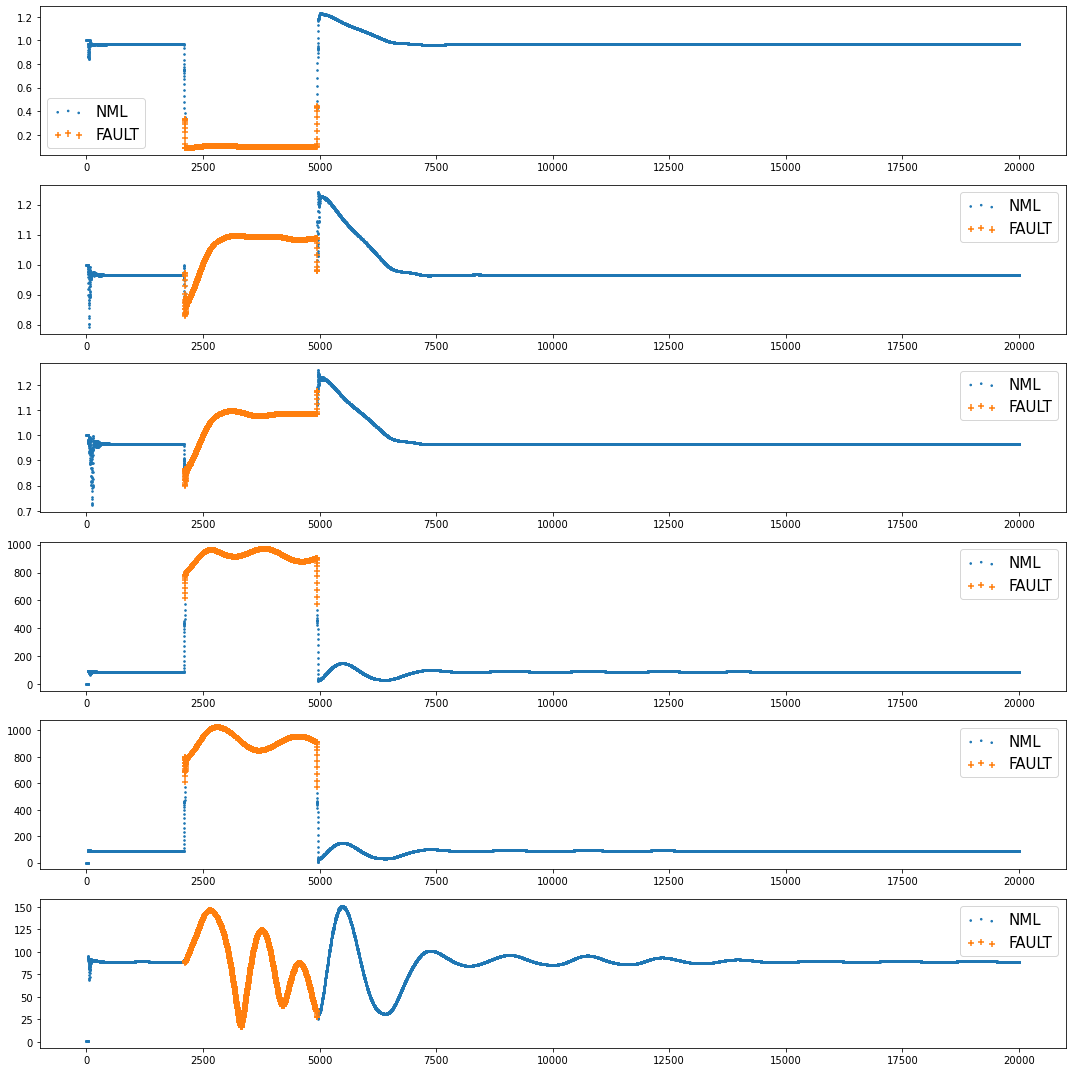

In [62]:
gend_labels = bin_gend_labels
df = new_data

plt.hist([bin_list[x] for x in gend_labels if x!=0])
fig, ax = plt.subplots(6,figsize=(15,15))

for j in range(col_len):
        
    legend_list = []
    for i in range(len(unq_labels)):

        extract = df[df.label==bin_list.index(unq_labels[i])][cols[j]]    
        
        #print(len(extract))
        if unq_labels[i]=='FAULT':
            temp = ax[j].scatter(extract.index,extract,marker='+',s=40)
        else:
            temp = ax[j].scatter(extract.index,extract,marker='.',s=10)
        

        legend_list.append(temp)

    ax[j].legend(legend_list,unq_labels,scatterpoints=3,ncol=1,fontsize=15)

fig.tight_layout()
plt.show()


In [63]:
new_data = new_data[new_data.label != 0]

In [71]:
testing = new_data[cols]

# predicting the labels for new dataset
mul_gend_labels = mul_clf.predict(testing)

# adding predicted labels to new dataframe
new_data['label'] = mul_gend_labels

<ipython-input-71-42ff09e7e343>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label'] = mul_gend_labels


In [72]:
x = list(new_data['label'])

sorted(set(x), key=x.index)

[6]

In [73]:
gend_labels = new_data['label']
total_labels = ['NML', 'AB', 'AC', 'BC', 'ABC', 'AG', 'BG', 'ABG', 'CG', 'ACG', 'BCG', 'ABCG']
df = new_data

x = list(gend_labels)

unq_labels = sorted(set(x), key=x.index)
unq_labels = [total_labels[each] for each in unq_labels]
print(unq_labels)

['BG']


In [74]:
from collections import Counter

matrics = sorted(zip([total_labels[each] for each in Counter(gend_labels).keys()],Counter(gend_labels).values() ), key=lambda x: x[1])
#print(Counter(gend_labels).values(),[total_labels[each] for each in Counter(gend_labels).keys()])
score = [list(j) for j in matrics][::-1]

In [75]:
total = sum([i[1] for i in score])

c=0
for i in score:
    
    score[c][1] = str(round(i[1]*100/total,2))+"%"
    #print("Fault type:", i[-1], "Percentage: {:.2f}%".format(i[1]*100/total))
    c+=1


In [76]:
score

[['BG', '100.0%']]

## Plotting predicted data

  Fault type Percentage
0         BG     100.0%


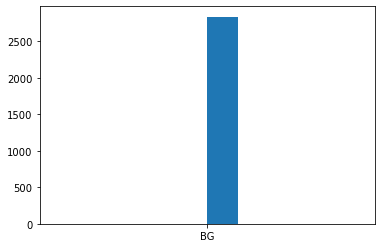

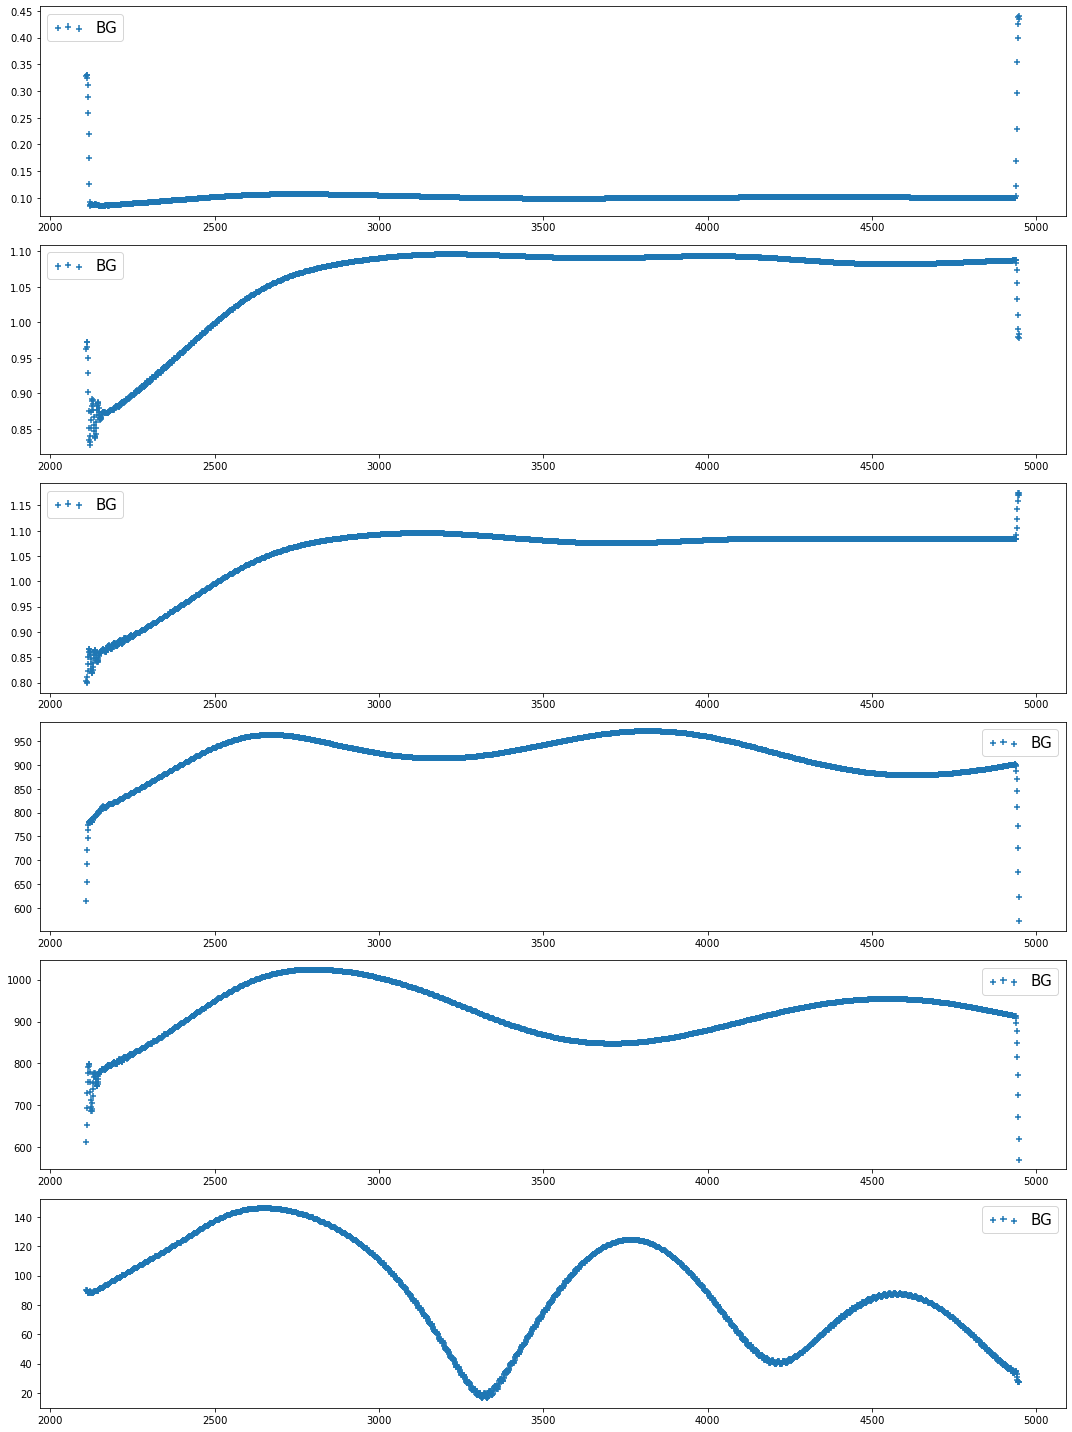

In [77]:
print(pd.DataFrame.from_records(score,columns=['Fault type','Percentage']))
plt.hist([total_labels[x] for x in gend_labels if x!=0])
fig, ax = plt.subplots(6,figsize=(15,20))


df = new_data
for j in range(col_len):
    
    
    legend_list = []
    for i in range(len(unq_labels)):

        extract = df[df.label==total_labels.index(unq_labels[i])][cols[j]]    
        
        #print(len(extract))
        if unq_labels[i]==score[0][0]:
            temp = ax[j].scatter(extract.index,extract,marker='+',s=40)
        else:
            temp = ax[j].scatter(extract.index,extract,marker='.',s=10)
        

        legend_list.append(temp)

    ax[j].legend(legend_list,unq_labels,scatterpoints=3,ncol=1,fontsize=15)

fig.tight_layout()
plt.show()
